In [4]:
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib.pyplot as plt
from nbi import NBI, get_featurizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Model definition

here we consider a very simple sine wave model, where t is time, f is frequency, A is amplitude, and $\phi_0$ is initial phase:

$f(t) = A\cdot\sin(f\cdot t+\phi_0$)

In [5]:
t = np.linspace(0,1,50)
def sine(param):
    phi0, A, freq = param
    return np.sin(t * freq + phi0) * A

## nbi set-up

normally for mcmc we would supply the likelihood function and the prior function. For nbi, we split the likelihood function into the physical model (sine) and the noise model (iid gaussian). For the noise model, we need a function to add noise for training, and a function to evaluate the likelihood given data, model, and errorbar. We also need a function to sample from the prior for the first round training set

In [6]:
from scipy.stats import uniform, truncnorm

# this is for sampling from the prior
def prior(n):
    """
    The first round training set is simulated from parameters drawn from the prior function below
    """
    phi0_prior = uniform(loc=0, scale=np.pi*2)
    A_prior = uniform(loc=1, scale=4)
    freq_prior = uniform(loc=2*np.pi, scale=10*np.pi)

    phi0 = phi0_prior.rvs(n)
    A = A_prior.rvs(n)
    freq = freq_prior.rvs(n)
    
    thetas = np.array([phi0, A, freq]).T
    return thetas

# this is for evaluating the prior probability
def log_prior(thetas):
    return 0

we consider i.i.d. gaussian noise of fixed amplitude 0.5.

In [7]:
x_err = 0.5

def noise(x, y=None):
    """
    x: light curve of shape (length,)
    y: parameter of shape (dim,)
    """
    rand = np.random.normal(0, 1, size=x.shape[0])
    x_noise = x + rand * x_err
    if y is None:
        return x_noise
    else:
        return x_noise, y
    
def log_like(x, x_path, params):
    # x is observed data, x_path is path to saved model prediction
    model =  np.load(x_path)
    chi2 = (((x - model) / x_err)**2).sum()
    return - chi2 / 2

## Sequential Inference

<ErrorbarContainer object of 3 artists>

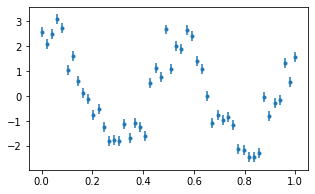

In [8]:
# this is our example data for inference

np.random.seed(0)
y_true = [1, 2, 4*np.pi]
x_obs = noise(sine(y_true))
plt.figure(figsize=(5,3))
plt.errorbar(t, x_obs, yerr=x_err, fmt='.')

if we only care about the particular x_obs generated above, then we apply nbi in multiple rounds

Generating simulations


512it [00:00, 1546.01it/s]


Effective sample size for this round 0.4
Effective sample size for all rounds:  0.4

---------------------- Round: 0 ----------------------

Epoch: 0


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 1


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 2


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 3


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 4


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 5


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 6


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 7


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 8


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 9


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

surrogate posterior


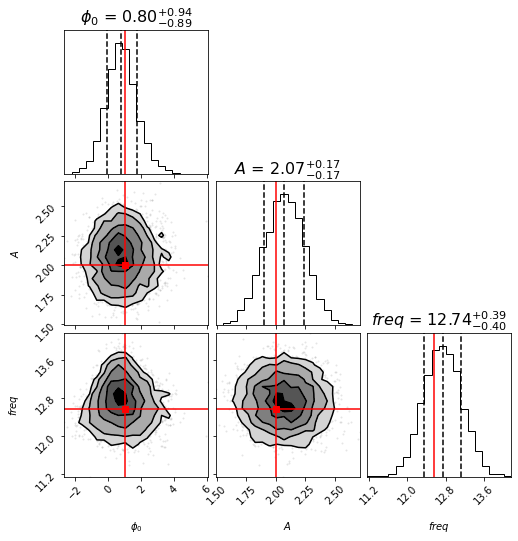

Generating simulations


512it [00:00, 1424.02it/s]


reweighted posterior from current round


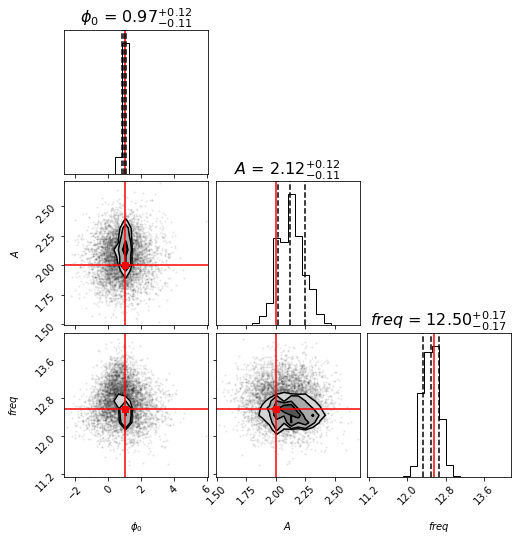

Effective sample size for this round 99.1
Effective sample size for all rounds:  99.5

---------------------- Round: 1 ----------------------

Epoch: 0


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 1


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 2


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 3


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 4


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 5


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 6


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 7


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 8


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 9


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

surrogate posterior


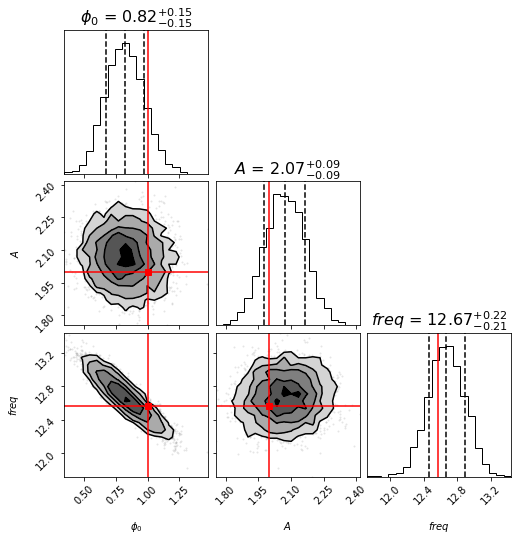

Generating simulations


512it [00:00, 1305.48it/s]


reweighted posterior from current round


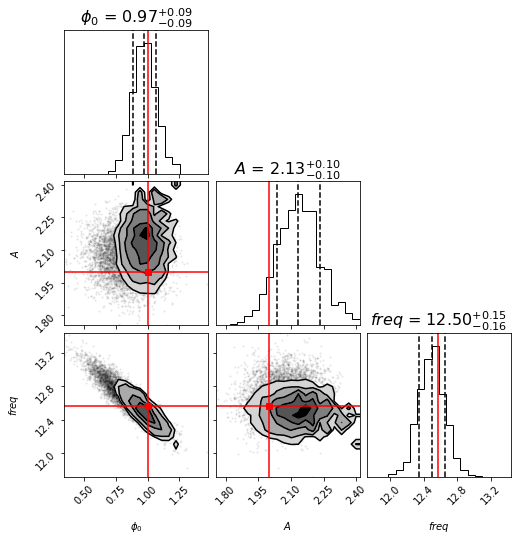

Effective sample size for this round 1124.0
Effective sample size for all rounds:  1223.5
reweighted posterior from all rounds


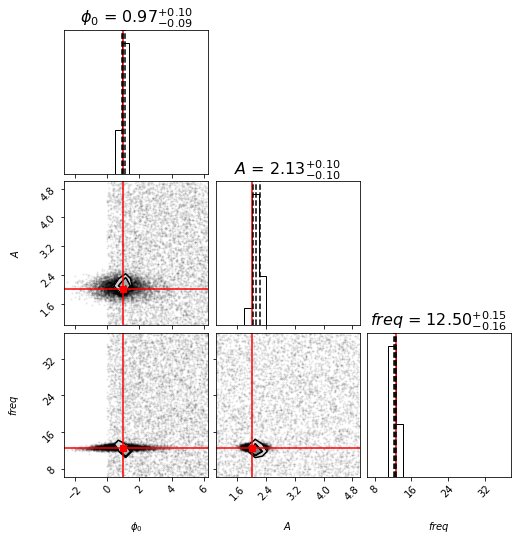

In [16]:
labels = [r"$\phi_0$", r"$A$", r"$freq$"]

# hyperparameters for the normalizing flow
flow_config = {
    'flow_hidden': 32,
    'num_cond_inputs': 32,
    'num_blocks': 4,
    'perm_seed': 3,
    'n_mog': 1                # number of gaussian mixture
}

# nbi has pre-defined neural networks for sequential data
resnet = get_featurizer('resnetrnn', 1, 32, depth=3)

engine = NBI(
    resnet,
    dim_param=3,
    physics=sine,
    instrumental=noise,
    prior_sampler=prior,
    log_like=log_like,
    log_prior=log_prior,
    flow_config=flow_config,
    labels=labels,
    directory='test',
    n_jobs=10,         # for generating training set
    parallel=True,      # only useful if GPU available
    tqdm_notebook=True
)

engine.run(
    x_obs,
    y_true=y_true,
    n_rounds=2,
    n_per_round=5120,
    n_epochs=10,
    train_batch=64,
    val_batch=64,
    lr=0.0005,
    min_lr=0.0002,        # learning rate decays from lr to min_lr at the last epoch
    f_val=0.1,            # fraction used as validation set
    early_stop_patience=5 # stop training if val loss not improve by 5 epochs
)

## Amortized Inference

if we care about a large number of different x_obs, then train nbi for only 1 round on samples generated from the prior space of interest

In [18]:
labels = [r"$\phi_0$", r"$A$", r"$freq$"]

# hyperparameters for the normalizing flow
flow_config = {
    'flow_hidden': 32,
    'num_cond_inputs': 32,
    'num_blocks': 4,
    'perm_seed': 3,
    'n_mog': 1                # number of gaussian mixture
}

# nbi has pre-defined neural networks for sequential data
resnet = get_featurizer('resnetrnn', 1, 32, depth=3)

engine_amortized = NBI(
    resnet,
    dim_param=3,
    physics=sine,
    instrumental=noise,
    prior_sampler=prior,
    log_like=log_like,
    log_prior=log_prior,
    flow_config=flow_config,
    labels=labels,
    directory='test',
    n_jobs=10,         # for generating training set
    parallel=True,      # only useful if GPU available
    tqdm_notebook=True
)

engine_amortized.run(
    None,                 # do not need x_obs
    y_true=None,
    n_rounds=1,
    n_per_round=5120 * 2, # same training set size as sequential (1 vs 2 rounds)
    n_epochs=10,
    train_batch=64,
    val_batch=64,
    lr=0.0005,
    min_lr=0.0002,        # learning rate decays from lr to min_lr at the last epoch
    f_val=0.1,            # fraction used as validation set
    early_stop_patience=5 # stop training if val loss not improve by 5 epochs
)

Generating simulations


1024it [00:00, 1609.53it/s]



---------------------- Round: 0 ----------------------

Epoch: 0


  0%|          | 0/9216 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]


Epoch: 1


  0%|          | 0/9216 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]


Epoch: 2


  0%|          | 0/9216 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]


Epoch: 3


  0%|          | 0/9216 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]


Epoch: 4


  0%|          | 0/9216 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]


Epoch: 5


  0%|          | 0/9216 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]


Epoch: 6


  0%|          | 0/9216 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]


Epoch: 7


  0%|          | 0/9216 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]


Epoch: 8


  0%|          | 0/9216 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]


Epoch: 9


  0%|          | 0/9216 [00:00<?, ?it/s]

  0%|          | 0/1024 [00:00<?, ?it/s]

to do inference with the trained engine, input x_obs and desired effective sample size of the posterior sample

Generating simulations


100it [00:00, 1230.47it/s]


Initial effective sample size N = 103.1
Requires N = 8703 more simulations
Generating simulations


871it [00:00, 1485.04it/s]


Total effective sample size N = 1038.5


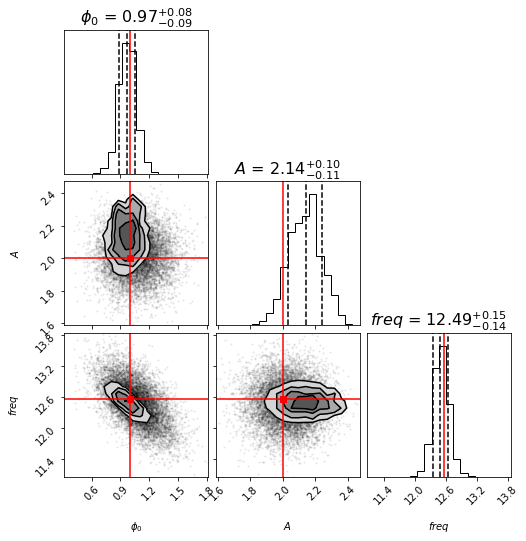

In [20]:
y_sample, weights = engine_amortized.infer(x_obs, neff_target=1000, y_true=y_true, corner_after=True)

notice how the ratio between effective vs. total sample size is ~10%. This compares to 20% at the end of sequential inference, demonstrating the faster convergence rate of multi-round training. Both used the same amount of training data

input parameters: [ 2.65063118  2.78889872 16.25000583]


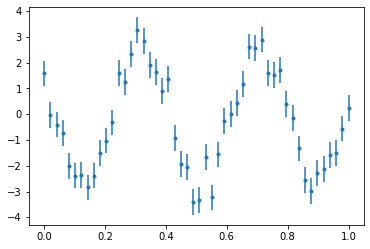

Generating simulations


100it [00:00, 1590.96it/s]


Initial effective sample size N = 81.0
Requires N = 11344 more simulations
Generating simulations


1135it [00:00, 1561.21it/s]


Total effective sample size N = 904.0


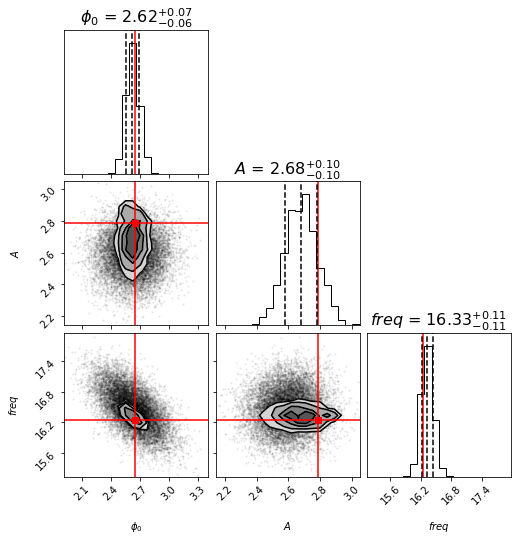

input parameters: [ 2.37997137  1.24259538 13.7962584 ]


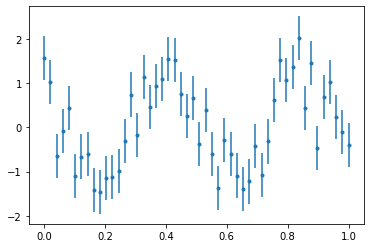

Generating simulations


100it [00:00, 819.41it/s]


Initial effective sample size N = 439.2
Requires N = 1276 more simulations
Generating simulations


128it [00:00, 971.18it/s]


Total effective sample size N = 1002.5


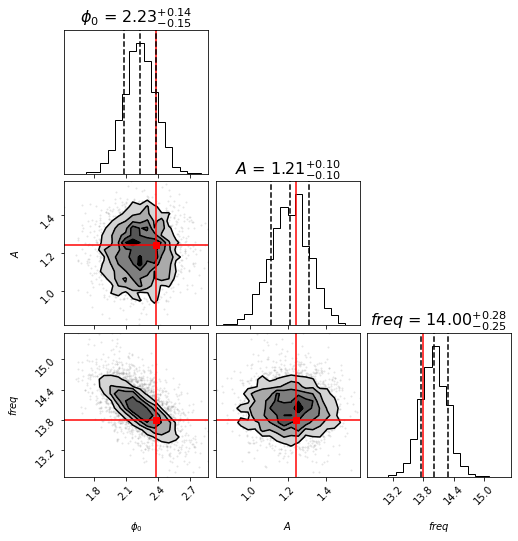

input parameters: [ 0.23127013  3.39680401 32.83254181]


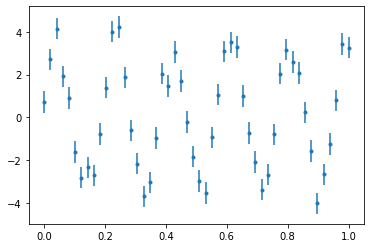

Generating simulations


100it [00:00, 1160.09it/s]


Initial effective sample size N = 17.5
Requires N = 56012 more simulations
Generating simulations


5602it [00:04, 1140.62it/s]


Total effective sample size N = 1314.8


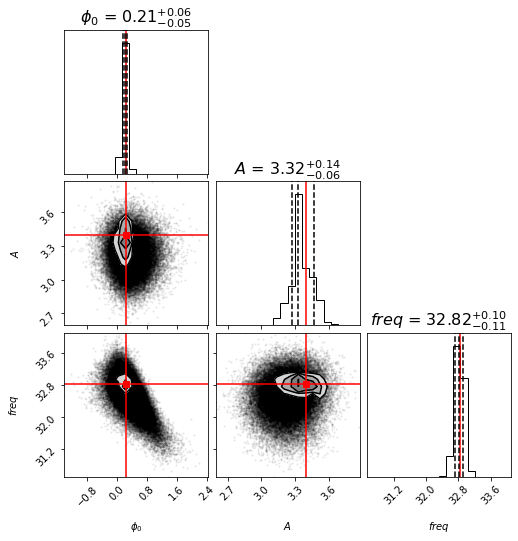

input parameters: [ 0.68221489  2.38945548 10.33301091]


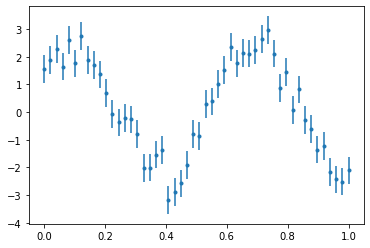

Generating simulations


100it [00:00, 1335.81it/s]


Initial effective sample size N = 114.3
Requires N = 7747 more simulations
Generating simulations


775it [00:00, 1433.62it/s]


Total effective sample size N = 1071.0


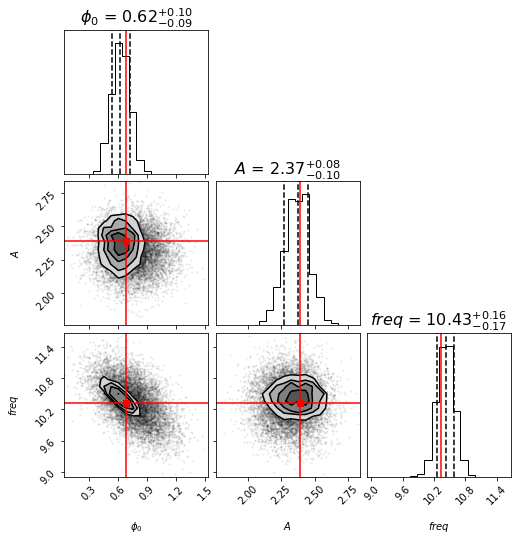

input parameters: [3.56682167 1.71454482 7.20603708]


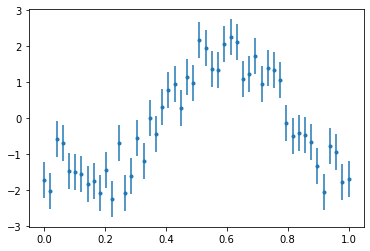

Generating simulations


100it [00:00, 1381.94it/s]


Initial effective sample size N = 134.1
Requires N = 6455 more simulations
Generating simulations


646it [00:00, 1319.26it/s]


Total effective sample size N = 938.4


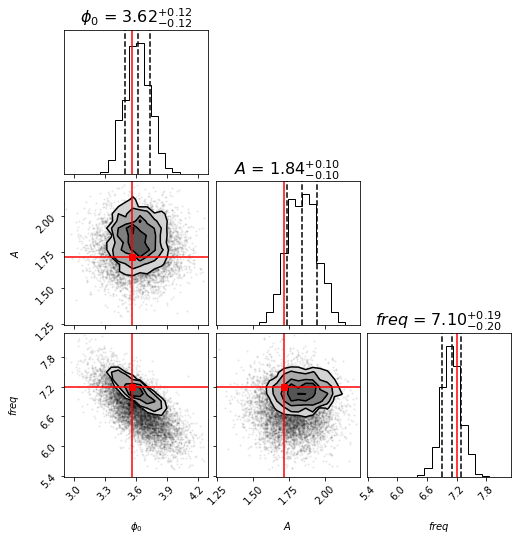

input parameters: [ 1.6018777   3.78328524 31.71740417]


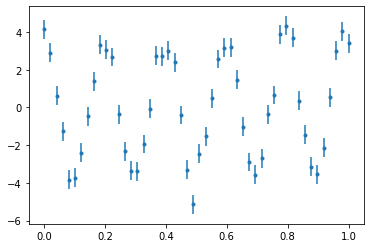

Generating simulations


100it [00:00, 1222.47it/s]


Initial effective sample size N = 32.1
Requires N = 30142 more simulations
Generating simulations


3015it [00:02, 1149.56it/s]


Total effective sample size N = 1396.6


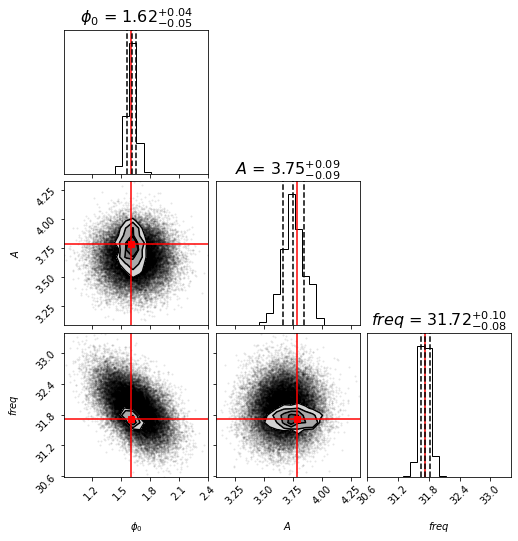

input parameters: [ 3.55890139  3.72109272 18.32134221]


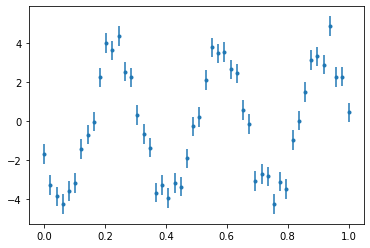

Generating simulations


100it [00:00, 1330.00it/s]


Initial effective sample size N = 37.6
Requires N = 25609 more simulations
Generating simulations


2561it [00:02, 907.02it/s]


Total effective sample size N = 918.5


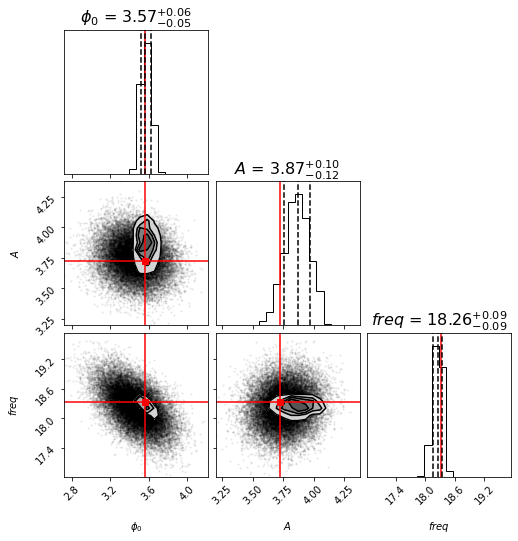

input parameters: [ 4.94864234  3.16273748 31.3239405 ]


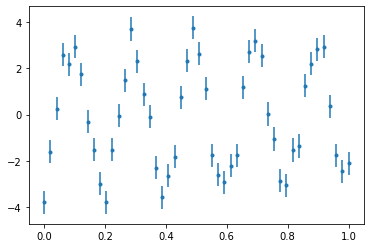

Generating simulations


100it [00:00, 1455.61it/s]


Initial effective sample size N = 54.7
Requires N = 17272 more simulations
Generating simulations


1728it [00:02, 621.51it/s]


Total effective sample size N = 1023.3


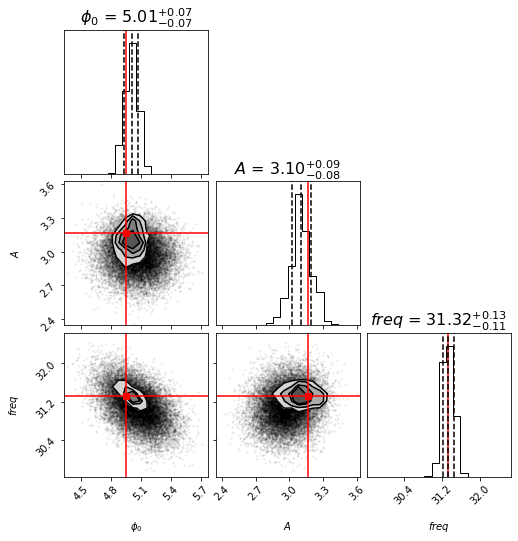

input parameters: [ 4.88525904  2.02579605 13.38087698]


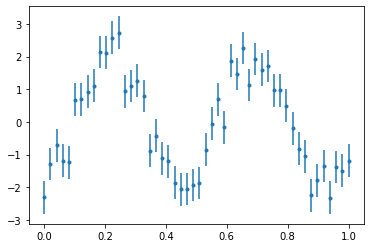

Generating simulations


100it [00:00, 1208.03it/s]


Initial effective sample size N = 115.7
Requires N = 7639 more simulations
Generating simulations


764it [00:00, 1263.41it/s]


Total effective sample size N = 910.6


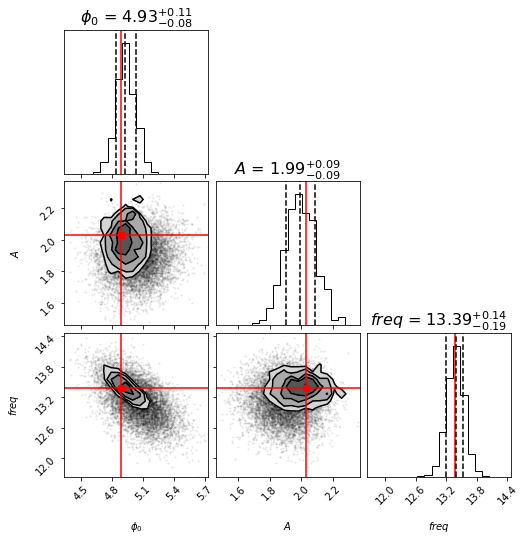

input parameters: [2.36795191 4.78665928 6.71846129]


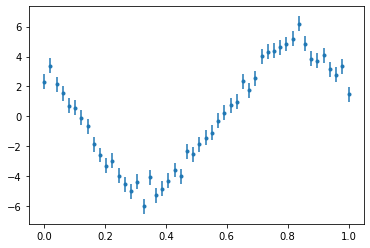

Generating simulations


100it [00:00, 1162.54it/s]


Initial effective sample size N = 6.3
Requires N = 157464 more simulations
Generating simulations


15747it [00:22, 708.89it/s]


Total effective sample size N = 584.8


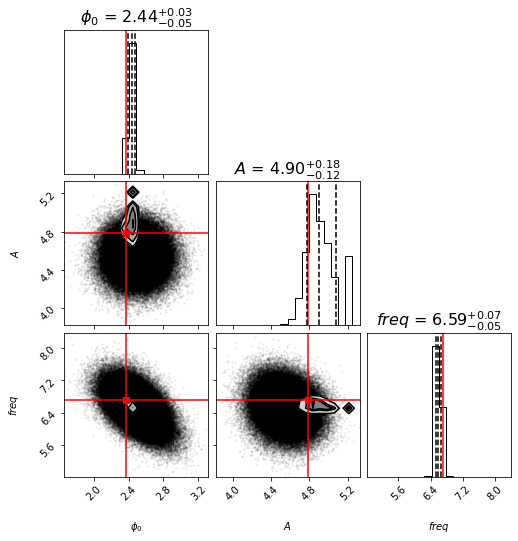

In [23]:
# try 10 randomly generated sine curves
params_list = prior(10)
for p in params_list:
    x_obs = noise(sine(p))
    print('input parameters:', p)
    plt.errorbar(t, x_obs, yerr=0.5, fmt='.')
    plt.show()
    engine_amortized.infer(x_obs, neff_target=1000,y_true=p, corner_after=True)

notice how the parameter combination [2.36795191 4.78665928 6.71846129] resulted in very low efficiency. I think it's because the neural network is only minimally trained (for 10 epochs). let see how sequential inference does on this

## Sequential Inference

<ErrorbarContainer object of 3 artists>

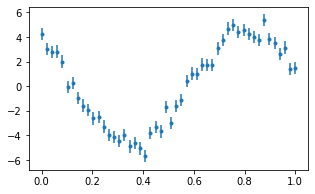

In [27]:
# this is our example data for inference

np.random.seed(0)
y_true = [2.36795191, 4.78665928, 6.71846129]
x_obs = noise(sine(y_true))
plt.figure(figsize=(5,3))
plt.errorbar(t, x_obs, yerr=x_err, fmt='.')

Generating simulations


512it [00:00, 639.44it/s]


Effective sample size for this round 0.0
Effective sample size for all rounds:  0.0

---------------------- Round: 0 ----------------------

Epoch: 0


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 1


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 2


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 3


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 4


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 5


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 6


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 7


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 8


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 9


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

surrogate posterior


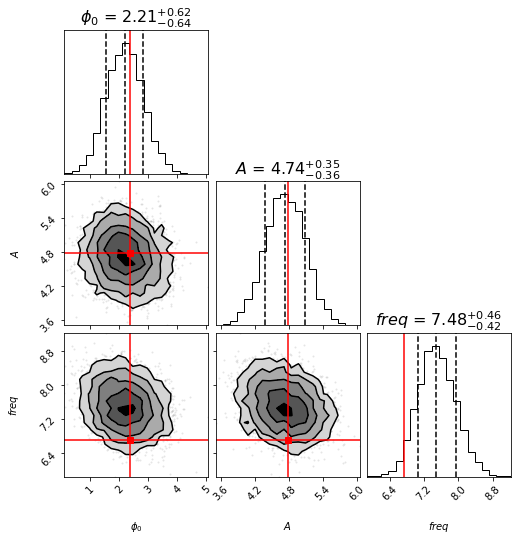

Generating simulations


512it [00:00, 1476.51it/s]


reweighted posterior from current round


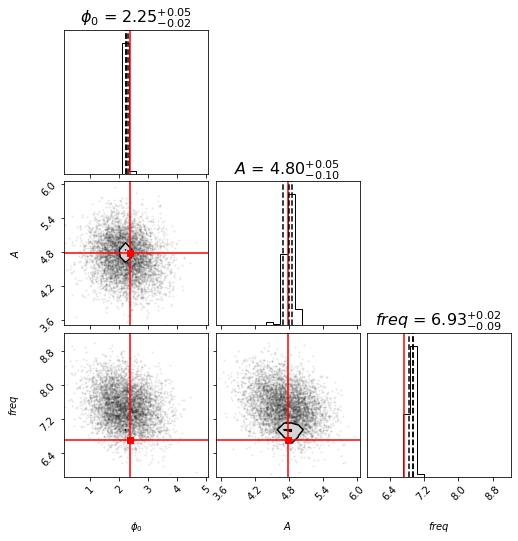

Effective sample size for this round 8.9
Effective sample size for all rounds:  8.9

---------------------- Round: 1 ----------------------

Epoch: 0


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 1


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 2


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 3


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 4


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 5


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 6


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 7


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 8


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]


Epoch: 9


  0%|          | 0/4608 [00:00<?, ?it/s]

  0%|          | 0/512 [00:00<?, ?it/s]

surrogate posterior


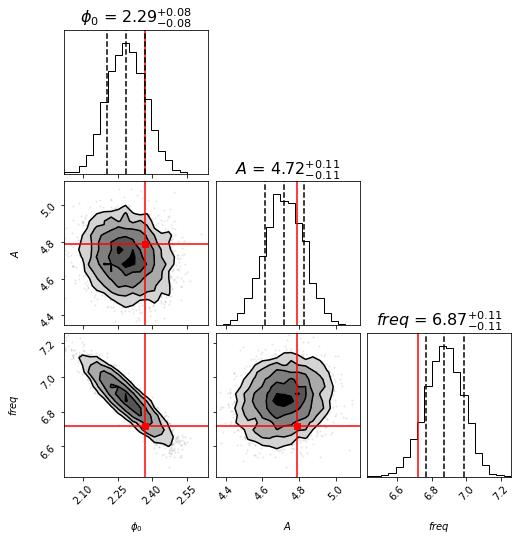

Generating simulations


512it [00:00, 1044.31it/s]


reweighted posterior from current round


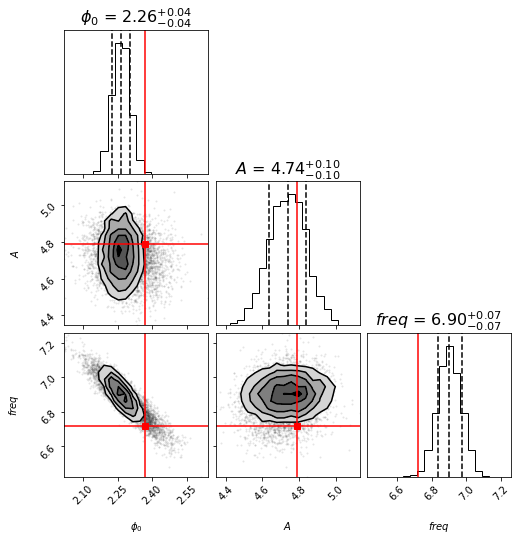

Effective sample size for this round 2646.2
Effective sample size for all rounds:  2655.1
reweighted posterior from all rounds


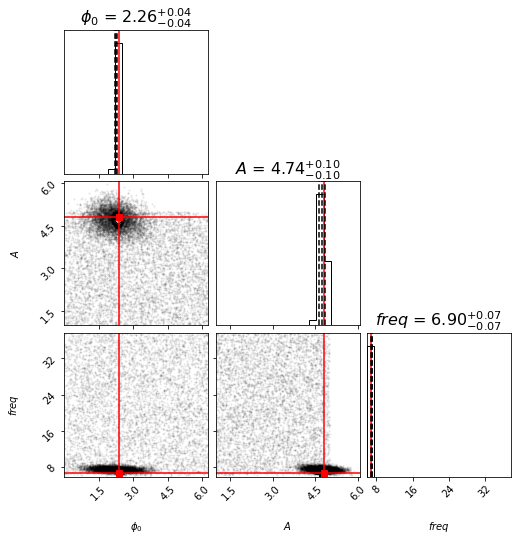

In [33]:
# nbi has pre-defined neural networks for sequential data
resnet = get_featurizer('resnetrnn', 1, 32, depth=3)

engine2 = NBI(
    resnet,
    dim_param=3,
    physics=sine,
    instrumental=noise,
    prior_sampler=prior,
    log_like=log_like,
    log_prior=log_prior,
    flow_config=flow_config,
    labels=labels,
    directory='test',
    n_jobs=10,         # for generating training set
    parallel=True,      # only useful if GPU available
    tqdm_notebook=True
)

engine2.run(
    x_obs,
    y_true=y_true,
    n_rounds=2,
    n_per_round=5120,
    n_epochs=10,
    train_batch=64,
    val_batch=64,
    lr=0.0005,
    min_lr=0.0002,        # learning rate decays from lr to min_lr at the last epoch
    f_val=0.1,            # fraction used as validation set
    early_stop_patience=5 # stop training if val loss not improve by 5 epochs
)

nailed it! sampling efficiency is >50% --- this is incredible. tells us that we need very good training to do amortized. sequential is much more efficient